In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import os
import matplotlib.pyplot as plt


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = "/content/drive/MyDrive/Dataset Model 1/ZNStaining"

def count_images(dataset_path):
    labels = os.listdir(dataset_path)
    counts = {}
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        counts[label] = len(os.listdir(label_path))
    return counts

counts = count_images(dataset_path)
print("Jumlah Gambar per label: ", counts)

Jumlah Gambar per label:  {'GoodStaining': 76, 'LessStaining': 40, 'OverStaining': 18}


In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 108 images belonging to 3 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 26 images belonging to 3 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs=50

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 16s/step - accuracy: 0.3627 - loss: 2.5779 - val_accuracy: 0.3077 - val_loss: 6.9105
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3438 - loss: 7.4495

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3438 - loss: 7.4495 - val_accuracy: 0.3462 - val_loss: 1.5018
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.5224 - loss: 1.3057 - val_accuracy: 0.6154 - val_loss: 0.9435
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5312 - loss: 0.9547 - val_accuracy: 0.9231 - val_loss: 0.4417
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.8906 - loss: 0.3768 - val_accuracy: 0.9231 - val_loss: 0.2798
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 978ms/step - accuracy: 0.8125 - loss: 0.4311 - val_accuracy: 0.9231 - val_loss: 0.2278
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9000 - loss: 0.2892 - val_accuracy: 0.9231 - val_loss: 0.2466
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9062 - loss: 0.3509 - val_accuracy: 0.9231 - val_loss: 0.3521
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.7630 - loss: 0.4256 - val_accuracy: 0.9231 - val_loss: 0.2114
Epoch 10/50
3/3 ━━━━

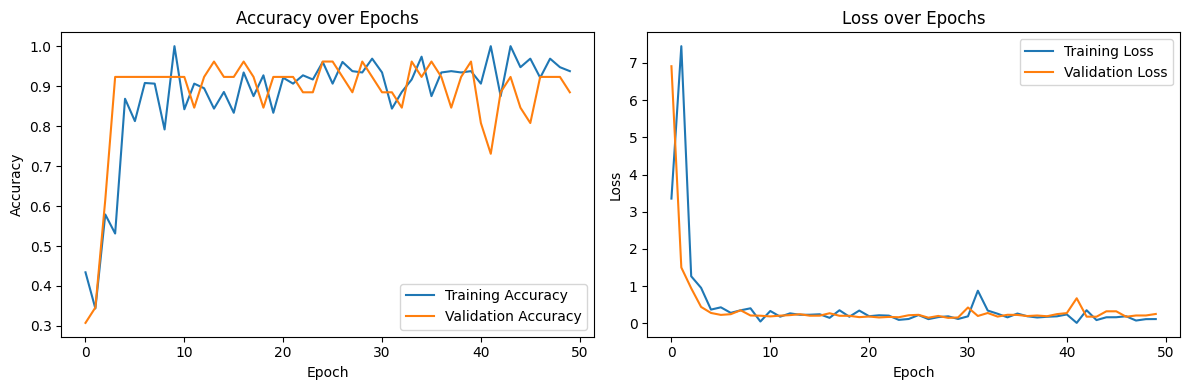

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8846 - loss: 0.2525
Loss: 0.25249794125556946, Accuracy: 0.8846153616905212
